In [615]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float, DateTime
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy.orm import Session
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime as dt

In [616]:
prev_year = dt.date.today() - dt.timedelta(days=365)
prev_year

datetime.date(2016, 10, 25)

In [617]:
#connecting to the sqlite table hawaii_hw that was created in data_engineering notebook, then connecting to it
engine = create_engine("sqlite:///hawaii_hw.sqlite")
conn = engine.connect()

In [618]:
#creating a session, i think??
session = Session(engine)

In [619]:
Base = automap_base()
Base.prepare(engine, reflect = True)
Base.classes.keys()

['hawaii_measurement', 'hawaii_station']

In [620]:
measurements = Base.classes.hawaii_measurement
stations = Base.classes.hawaii_station

In [621]:
everything_tuples = session.query(measurements.station, measurements.date, measurements.rainfall, measurements.temp).all()
everything_tuples[30]

('USC00519397', '2010-02-07', 0, 64)

In [622]:
station = [x[0] for x in everything_tuples]
dates = pd.to_datetime([x[1] for x in everything_tuples])
rainfall = [x[2] for x in everything_tuples]
temp = [x[3] for x in everything_tuples]
df = pd.DataFrame(station)
df[1] = dates
df[2] = rainfall
df[3] = temp

df.rename(columns = {0: 'station',  1: 'date', 2: 'rainfall', 3: 'temp'})

,station,date,rainfall,temp
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-07,0.06,70
5,USC00519397,2010-01-08,0.00,64
6,USC00519397,2010-01-09,0.00,68
7,USC00519397,2010-01-10,0.00,73
8,USC00519397,2010-01-11,0.01,64
9,USC00519397,2010-01-12,0.00,61


In [623]:
rainfall_tuples = session.query(measurements.date,measurements.station, measurements.rainfall).all()

In [624]:
rainfall_df = pd.DataFrame(dates)
rainfall_df[1] = station
rainfall_df[2] = rainfall
rainfall_df[3] = temp
rainfall_df.columns = ['date', 'station', 'rainfall', 'temp']

In [625]:
one_year = rainfall_df[rainfall_df['date'] > prev_year]
waikiki_station = one_year[one_year['station'] == 'USC00519397']
waikiki_rainfall = waikiki_station['rainfall']
waikiki_date = waikiki_station['date']
yearsFmt = mdates.DateFormatter('%m-%d-%y')
one_year

,date,station,rainfall,temp
2388,2016-10-26,USC00519397,0.00,78
2389,2016-10-27,USC00519397,0.00,77
2390,2016-10-28,USC00519397,0.00,78
2391,2016-10-29,USC00519397,0.00,77
2392,2016-10-30,USC00519397,0.24,76
2393,2016-10-31,USC00519397,0.03,77
2394,2016-11-01,USC00519397,0.00,77
2395,2016-11-02,USC00519397,0.00,77
2396,2016-11-03,USC00519397,0.00,77
2397,2016-11-04,USC00519397,0.00,77


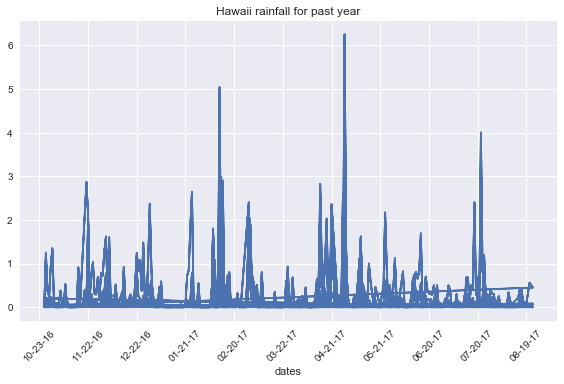

In [626]:
#hawaii precip
one_year = rainfall_df[rainfall_df['date'] > prev_year]
yearsFmt = mdates.DateFormatter('%m-%d-%y')

ax = plt.axes()

plt.plot(one_year['date'], one_year['rainfall'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(12))
plt.xticks(rotation=45)
plt.xlabel('dates')
plt.title("Hawaii rainfall for past year")
plt.tight_layout()


plt.show()

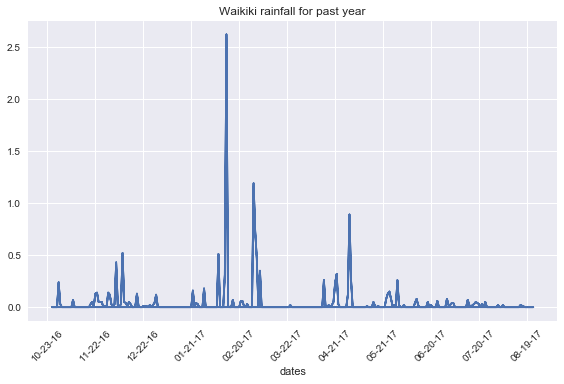

In [627]:

#waikiki rainfall
ax = plt.axes()

plt.plot(waikiki_date, waikiki_rainfall)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(12))
plt.xticks(rotation=45)
plt.xlabel('dates')

plt.title("Waikiki rainfall for past year")
plt.tight_layout()


plt.show()

#I misread the question and ended up doing a precipitation 
graph for each station

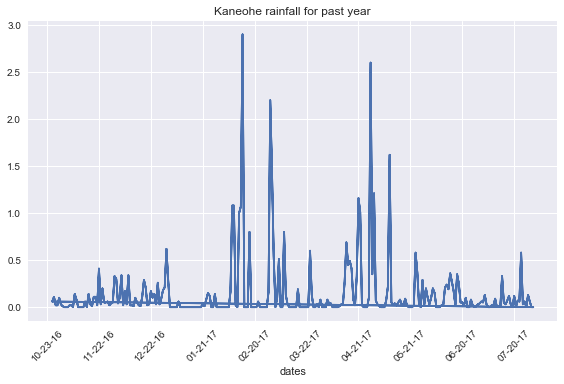

In [628]:
#kaneohe precip
kaneohe_station = one_year[one_year['station'] == 'USC00513117']
kaneohe_rainfall = kaneohe_station['rainfall']
kaneohe_date = kaneohe_station['date']

ax = plt.axes()

plt.plot(kaneohe_date, kaneohe_rainfall)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(12))
plt.xticks(rotation=45)
plt.xlabel('dates')

plt.title("Kaneohe rainfall for past year")
plt.tight_layout()
plt.show()

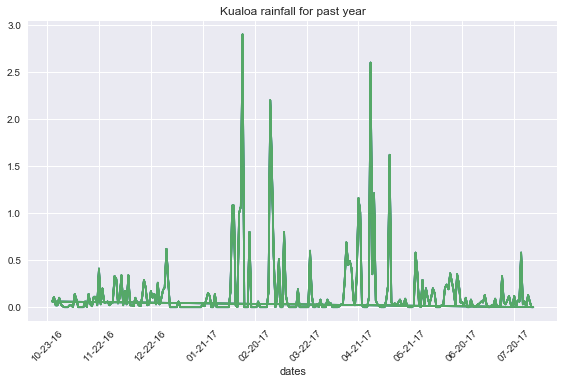

In [630]:

kualoa_station = one_year[one_year['station'] == 'USC00514830']
kualoa_rainfall = kaneohe_station['rainfall']
kualoa_date = kaneohe_station['date']

ax = plt.axes()

plt.plot(kualoa_date, kualoa_rainfall)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(12))
plt.xticks(rotation=45)
plt.xlabel('dates')

plt.title("Kualoa rainfall for past year")
plt.tight_layout()
plt.show()

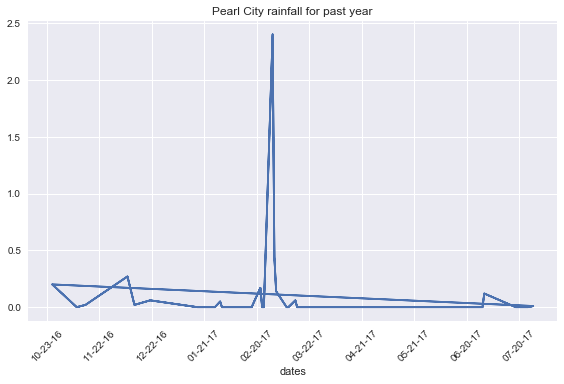

In [631]:
#pearl city precip
pearl_station = one_year[one_year['station'] == 'USC00517948']
pearl_rainfall = pearl_station['rainfall']
pearl_date = pearl_station['date']
ax = plt.axes()

plt.plot(pearl_date, pearl_rainfall)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(12))
plt.xticks(rotation=45)
plt.xlabel('dates')

plt.title("Pearl City rainfall for past year")
plt.tight_layout()
plt.show()

In [632]:
#upper wahiawa precip doesn't have data for the past year so we skip


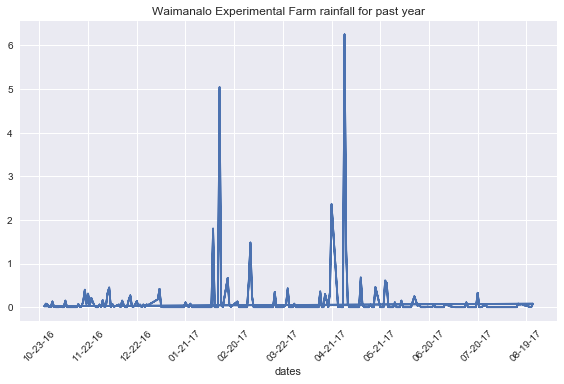

In [633]:
#waimanalo experimental farm precip
waimanalo_station = one_year[one_year['station'] == 'USC00519523']
waimanalo_rainfall = waimanalo_station['rainfall']
waimanalo_date = waimanalo_station['date']
ax = plt.axes()

plt.plot(waimanalo_date, waimanalo_rainfall)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(12))
plt.xticks(rotation=45)
plt.xlabel('dates')

plt.title("Waimanalo Experimental Farm rainfall for past year")
plt.tight_layout()
plt.show()

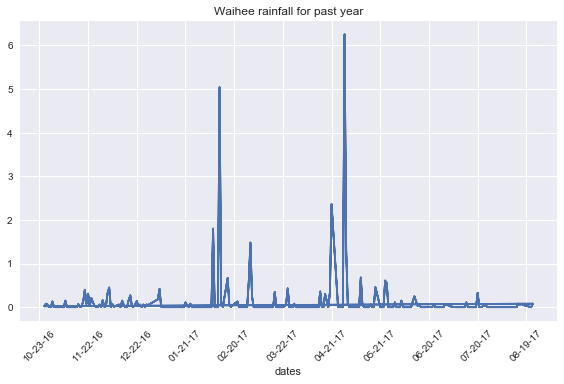

In [634]:
#waihee precip 
waihee_station = one_year[one_year['station'] == 'USC00519281']
waihee_rainfall = waihee_station['rainfall']
waihee_date = waihee_station['date']
ax = plt.axes()

plt.plot(waimanalo_date, waimanalo_rainfall)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(12))
plt.xticks(rotation=45)
plt.xlabel('dates')

plt.title("Waihee rainfall for past year")
plt.tight_layout()
plt.show()

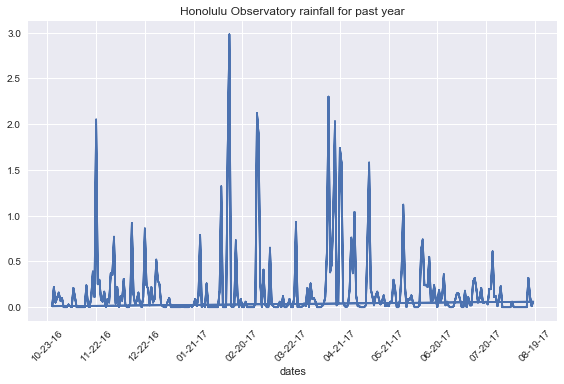

In [635]:
#honolulu observatory precip
honolulu_station = one_year[one_year['station'] == 'USC00519281']
honolulu_rainfall = honolulu_station['rainfall']
honolulu_date = honolulu_station['date']
ax = plt.axes()

plt.plot(honolulu_date, honolulu_rainfall)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(12))
plt.xticks(rotation=45)
plt.xlabel('dates')

plt.title("Honolulu Observatory rainfall for past year")
plt.tight_layout()
plt.show()

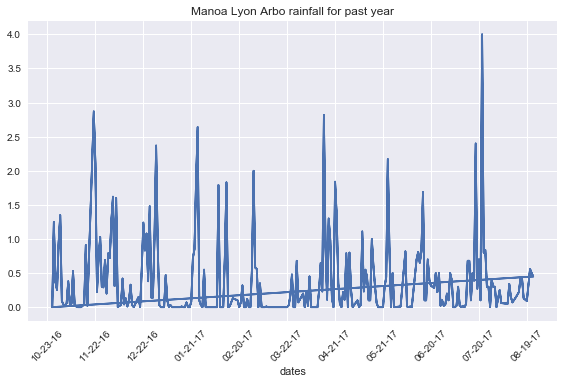

In [636]:
#manoa lyon arboretum precip

manoa_station = one_year[one_year['station'] == 'USC00516128']
manoa_rainfall = manoa_station['rainfall']
manoa_date = manoa_station['date']
ax = plt.axes()

plt.plot(manoa_date, manoa_rainfall)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(12))
plt.xticks(rotation=45)
plt.xlabel('dates')

plt.title("Manoa Lyon Arbo rainfall for past year")
plt.tight_layout()
plt.show()

In [637]:
#now we graph the bar plot temp for waihee because it has the most tobs

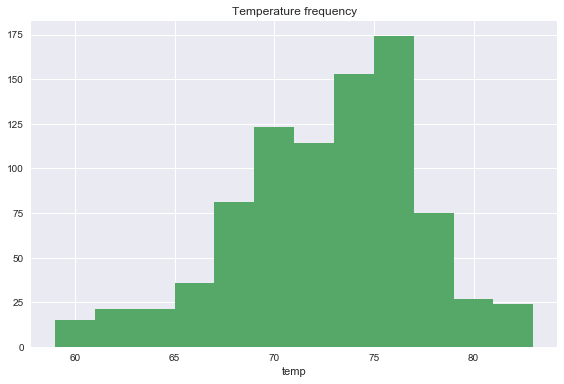

In [639]:
from collections import Counter

waihee_temp = waihee_station['temp']
c= Counter(waihee_temp)
plt.hist(waihee_temp, 12)
plt.title("Temperature frequency")
plt.xlabel("temp")

plt.tight_layout()
plt.show()


In [640]:
#find information about waihee's temp (USC00519281)
def calc_temps(d1, d2):
    begin = pd.to_datetime(d1)
    end = pd.to_datetime(d2)
    max_temp = conn.execute("select max(temp) from hawaii_measurement WHERE station = 'USC00519281'").fetchall()[0][0]
    avg_temp = conn.execute("select avg(temp) from hawaii_measurement WHERE station = 'USC00519281'").fetchall()[0][0]
    min_temp = conn.execute("select min(temp) from hawaii_measurement WHERE station = 'USC00519281'").fetchall()[0][0]

    N = 1
    width = 1
    error = max_temp- min_temp
    plt.bar(N, avg_temp, width, yerr = error)
    plt.title("Avg Temp in Waihee")
    plt.tight_layout()
    plt.xticks([])
    plt.show()

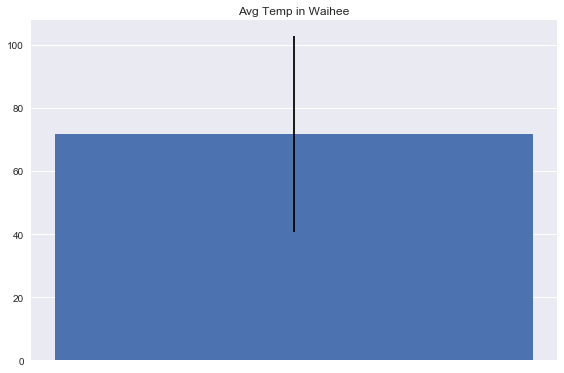

In [641]:
calc_temps('2017-10-20', '2017-10-22')